In [1]:
%matplotlib inline
import waves
import matplotlib.pyplot as plt
import numpy as np

A/D conversion
=============

In [2]:
CD = waves.CDFormatSampler('CD')

SACD = waves.DSDSampler('SACD', 64 * 44100, 16)

# DVD possible combinations (16-, 20- or 24-bits per sample)
# Channels                          | 44.1 kHz | 48 kHz | 88.2 kHz | 96 kHz | 176.4 kHz | 192 kHz
# Mono (1.0)                        |    Yes   |  Yes   |    Yes   |  Yes   |    Yes    |   Yes   
# Stereo (2.0)                      |    Yes   |  Yes   |    Yes   |  Yes   |    Yes    |   Yes   
# Stereo (2.1)                      |    Yes   |  Yes   |    Yes   |  Yes   |    No     |   No   
# S+M surround (3.0 or 3.1)         |    Yes   |  Yes   |    Yes   |  Yes   |    No     |   No   
# Quad (4.0 or 4.1)                 |    Yes   |  Yes   |    Yes   |  Yes   |    No     |   No   
# 3-stereo (3.0 or 3.1)             |    Yes   |  Yes   |    Yes   |  Yes   |    No     |   No   
# 3-stereo+M surround (4.0 or 4.1)  |    Yes   |  Yes   |    Yes   |  Yes   |    No     |   No   
# Full surround (5.0 or 5.1)        |    Yes   |  Yes   |    Yes   |  Yes   |    No     |   No   
DVDA = waves.PCMSampler('DVD Audio', 88200, 20)

# High Fidelity Blu-ray Pure Audio uses 24 bits at 192 kHz (or also 96 kHz)
BDA = waves.HFPALinearPCM('Blu-Ray Audio')

# Generic, define sampling frequency (Hz) and resolution (bits) to your heart's content
GenericPCM_1 = waves.PCMSampler('Generic 1', 44100, 4) # Same CD frequency, lower resolution
GenericPCM_2 = waves.PCMSampler('Generic 2', 14000, 16) # Same CD resolution, lower frequency

CD's stream: [32768 36645 40444 44087 47501 50616 53369 55705 57577 58945 59783 60074
 59811 59000 57657 55810 53497 50763 47664 44264 40630 36837 32962 29083
 25278 21626 18199 15067 12294  9936  8040  6646  5781  5463  5698  6482
  7798  9621 11912 14627 17708 21095 24719 28505 32378 36259 40069 43732
 47172 50320 53112 55492 57412 58832 59724 60069 59862 59105 57815 56017
 53748 51053 47989 44615 41002 37222 33351 29469 25653 21982 18529 15365
 12553 10151  8208  6762  5843  5470  5650  6379  7643  9417 11663 14338
 17385 20745 24348 28122 31990 35873 39694 43374 46840 50020 52850 55274
 57242 58713 59659 60060 59907 59205 57967 56218 53995 51340 48310 44965
 41372 37605 33740 29855 26029 22340 18862 15666 12817 10372  8380  6883
  5911  5482  5607  6282  7494  9217 11419 14052 17065 20397 23979 27739
 31601]
Generic 1's stream: [ 8  8  9 10 11 12 12 13 13 13 14 14 14 14 13 13 12 12 11 10  9  8  8  7
  6  5  4  3  3  2  2  2  1  1  1  1  2  2  3  3  4  5  6  7  7  8  9 10
 11 12 12 

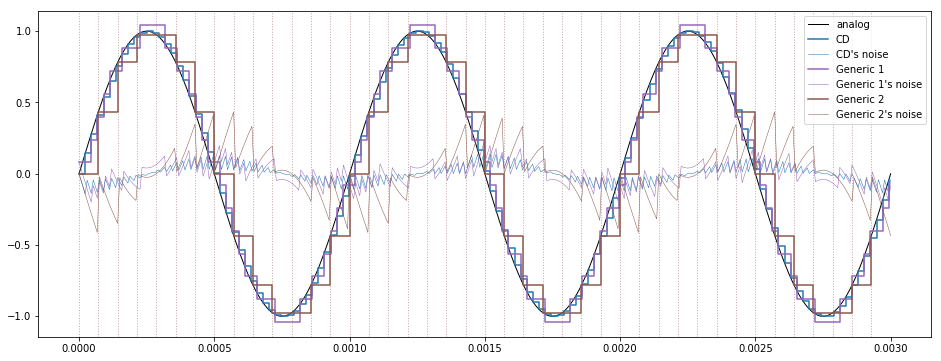

In [3]:
f = 1e3 # 1KHz
audio = waves.AnalogSineWave('analog', f, gain=1, phase=0)
n_waves = 3
length = n_waves * 1/f

audio.plot(length, plt, color='k', lw=1)
CD.sample(audio, length, plt, lw=1.5)
##SACD.sample(audio, length, plt, color='b', lw=1.5)
#DVDA.sample(audio, length, plt, color='g', lw=1.5)
#BDA.sample(audio, length, plt, color='m', lw=1.5)
GenericPCM_1.sample(audio, length, plt, lw=1.5)
GenericPCM_2.sample(audio, length, plt, lw=1.5)
[plt.axvline(t, color=GenericPCM_2.color, lw=1, ls=':', alpha=0.5) for t in np.arange(0, length, GenericPCM_2.sampling_interval)]
#[plt.axhline(A, color='b', lw=1, ls=':', alpha=0.5) for A in np.linspace(audio.Amin, audio.Amax, GenericPCM.levels)]
plt.legend()
plt.gcf().set_size_inches(16, 6)

Let us now add some dither and see how the noise behaves

CD's stream: [34314 41182 43669 35265 47914 43709 54000 55559 54465 56060 61370 60210
 60723 57211 54744 46653 57621 50012 50899 40044 43138 40104 28202 29427
 29578 25914 20905 11570  4941  9595  4004 10369  9036  8682   752  3579
  9274 11853  5310 18618 16699 22649 23139 33934 31830 37409 39689 45934
 46149 55839 55053 57692 52673 55625 65161 63810 53874 58409 64278 54304
 57676 51436 46950 44842 38254 45123 35302 23782 23318 25141 23500 18091
 11058 13005 11539  7398  6718  2202  3987  7564  5140  5351 11285 15203
 24168 23331 26241 30101 26037 35663 45221 46854 47245 52970 56484 59262
 48975 60004 55973 63863 54233 61201 60947 54133 50612 50036 50267 49719
 40373 39230 35715 34076 20369 21350 11157 12171  7694  8444  4205 12140
   900  8146  1235   303  6534  9267 11328 17685 10417 23429 19844 26436
 22870]
Generic 1's stream: [ 7  8  9 10 13 11 11 13 12 12 14 14 14 12 14 13 13 12 12 10 10  8  8  7
  7  7  6  4  2  3  0  2  1  1  2  0  3  2  2  3  4  4  7  6  8 10  9 10
 10 11 12 

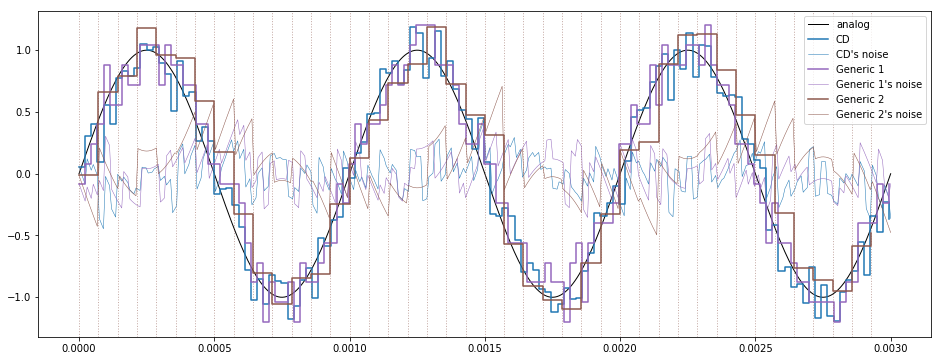

In [4]:
audio.plot(length, plt, color='k', lw=1)
CD.sample(audio, length, plt, dither=0.35, lw=1.5)
##SACD.sample(audio, length, plt, color='b', lw=1.5)
#DVDA.sample(audio, length, plt, color='g', lw=1.5)
#BDA.sample(audio, length, plt, color='m', lw=1.5)
GenericPCM_1.sample(audio, length, plt, dither=0.35, lw=1.5)
GenericPCM_2.sample(audio, length, plt, dither=0.35, lw=1.5)
[plt.axvline(t, color=GenericPCM_2.color, lw=1, ls=':', alpha=0.5) for t in np.arange(0, length, GenericPCM_2.sampling_interval)]
#[plt.axhline(A, color='b', lw=1, ls=':', alpha=0.5) for A in np.linspace(audio.Amin, audio.Amax, GenericPCM.levels)]
plt.legend()
plt.gcf().set_size_inches(16, 6)

The noise is now more decorrelated from the signal, at the cost of increased noise power